In [1]:
import panel
import gempy as gp
import gempy_viewer as gpv
import pickle
import vtk
import rasterio
import pyevtk
from discretize import TensorMesh
from discretize.utils import mkvc, active_from_xyz
from scipy.interpolate import LinearNDInterpolator
from SimPEG import maps
from SimPEG.potential_fields import gravity
from SimPEG import discretize

from gempy.core.data import GeoModel
from gempy.core.data import Grid
from gempy.core.data.grid_modules import RegularGrid
# from PyQt6 import QtWidgets, QtGui

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os, time
import pyvista as pv
from gempy_engine.core.data.stack_relation_type import StackRelationType


np.random.seed(55500)

No module named 'osgeo'


WARNING (aesara.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (aesara.configdefaults): g++ not detected!  Aesara will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set Aesara flags cxx to an empty string.


DistutilsPlatformError: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/

In [2]:
geo_model: gp.data.GeoModel = gp.create_geomodel(
    project_name='Model1',
    extent=[853610.2891, 855569.4948, 
            987530.5888, 988620.4712, 
            -6600, 3000], #x, y, z
    resolution=None,
    refinement=4, # We will use octrees
    importer_helper= gp.data.ImporterHelper(
        path_to_orientations= "capas_model_orientaciones.csv",
        path_to_surface_points= "capas_model_points.csv",

    )
)

In [3]:
geo_model.surface_points_copy

X,Y,Z,id,nugget
853614.29,988145.94,1168.10,4254988,0.00
853677.07,988145.94,943.33,4254988,0.00
853725.02,988145.94,760.64,4254988,0.00
853780.59,988145.94,548.98,4254988,0.00
853846.73,988145.94,490.77,4254988,0.00
853912.88,988145.94,432.56,4254988,0.00
853976.38,988145.94,411.39,4254988,0.00
854066.34,988145.94,421.98,4254988,0.00
854166.88,988145.94,448.43,4254988,0.00
854289.12,988145.94,399.79,4254988,0.00


In [4]:
geo_model.orientations_copy

X,Y,Z,G_x,G_y,G_z,id,nugget
853846.73,988145.94,490.77,0.64,0.00,0.77,4254988,0.01
855426.30,988145.94,231.47,-0.64,-0.00,0.77,4254988,0.01
854890.72,987648.61,95.86,0.00,0.50,0.87,4254988,0.01
854890.72,988467.86,561.28,0.00,-0.87,0.50,4254988,0.01
854345.21,988145.94,-583.18,1.00,0.00,0.05,125882011,0.01
855145.25,988145.94,-602.06,-1.00,-0.00,0.07,125882011,0.01
854890.72,987868.40,-1031.10,0.00,1.00,0.03,125882011,0.01
854890.72,988353.06,-907.12,0.00,-1.00,0.03,125882011,0.01
853829.27,988145.94,300.27,0.64,0.00,0.77,223849692,0.01
855424.71,988145.94,-241.07,-0.64,-0.00,0.77,223849692,0.01


In [5]:
geo_model.structural_frame

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=default_formation,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Complejo_Dacitico,
	color=#015482,
	is_active=True
),
Element(
	name=Cuerpo_Intrusivo,
	color=#9f0052,
	is_active=True
),
Element(
	name=Flujo_Piroclastico,
	color=#ffbe00,
	is_active=True
),
Element(
	name=Sucesion_Piroclastica,
	color=#728f02,
	is_active=True
),
Element(
	name=Sucesion_Volcanica,
	color=#443988,
	is_active=True
)
]
)
],
	fault_relations=
[[False]],

In [6]:
gp.map_stack_to_surfaces(
    gempy_model=geo_model,
    mapping_object=  # TODO: This mapping I do not like it too much. We should be able to do it passing the data objects directly
    {
        "Strat_Series1": ('Complejo_Dacitico'),     
        "Strat_Series2": ('Cuerpo_Intrusivo'),
        "Strat_Series3": ('Flujo_Piroclastico'),
        "Strat_Series4": ('Sucesion_Piroclastica'),
        "Strat_Series5": ('Sucesion_Volcanica')
    }
)
geo_model.structural_frame  # Display the resulting structural frame


StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=Strat_Series1,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Complejo_Dacitico,
	color=#015482,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_Series2,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Cuerpo_Intrusivo,
	color=#9f0052,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_Series3,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Flujo_Piroclastico,
	color=#ffbe00,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_Series4,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Sucesion_Piroclastica,
	color=#728f02,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_Series5,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Sucesion_Volcanica,
	color=#443988,
	is_active=True
)
]
)
],
	fault_relations=
[[False, False, False, False, False],
 [False, False, False, False, False],
 [False, False, False, False, False],
 [False, False, False, False, False],
 [False, False, False, False, False]],

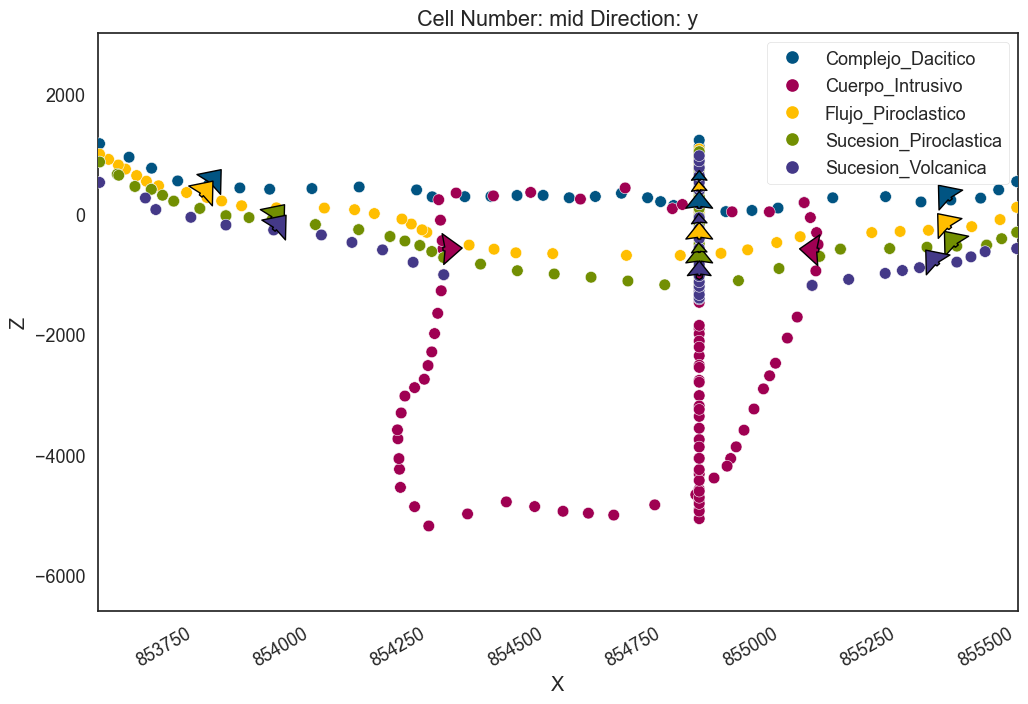

In [9]:
plot = gpv.plot_2d(geo_model, show_lith=False, show_boundaries=False,)

Active grids: GridTypes.NONE|TOPOGRAPHY|OCTREE


C:\Users\user\anaconda3\envs\Gempy_Mesh\lib\site-packages\gempy_viewer\API\_plot_2d_API.py:174: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


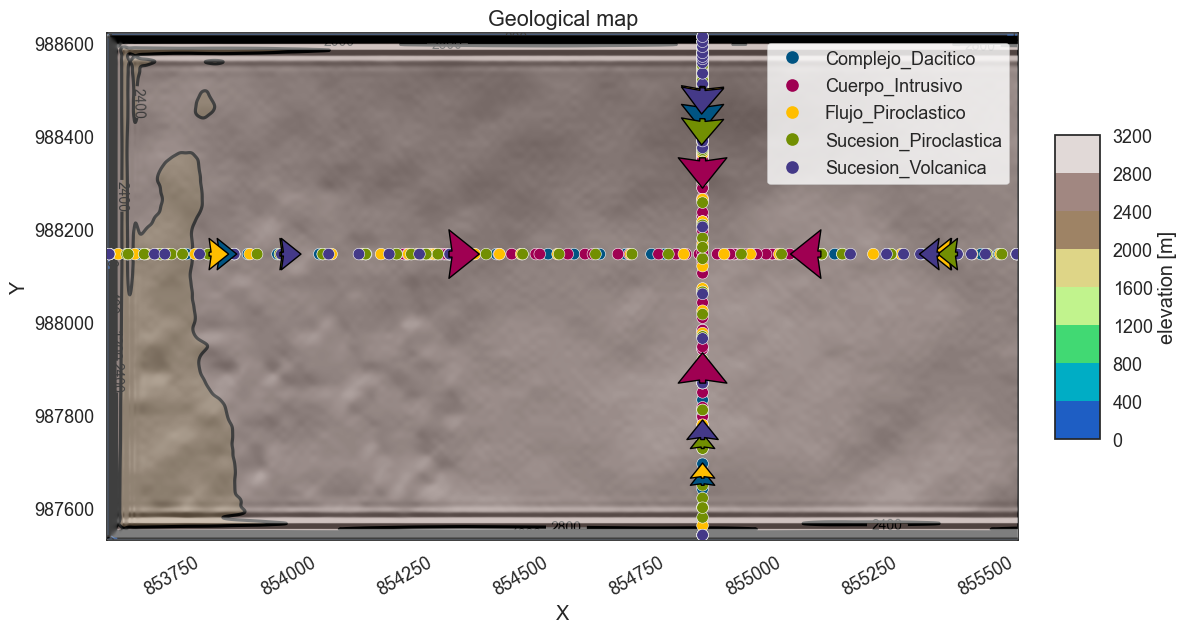

In [7]:
gp.set_topography_from_file(
    grid=geo_model.grid,
    filepath=os.path.join("Volcan_CM2.tif"),
)

gpv.plot_2d(geo_model, show_topography=True, section_names=['topography'], show_data=True)

In [8]:
geo_model.grid

Grid(values=array([[853671.51427813, 987564.647625  ,  -6300.        ],
       [853671.51427813, 987564.647625  ,  -5700.        ],
       [853671.51427813, 987564.647625  ,  -5100.        ],
       ...,
       [855566.62371855, 988594.60752883,   2574.        ],
       [855566.62371855, 988607.25287767,   2578.        ],
       [855566.62371855, 988619.8982265 ,      0.        ]]), length=array([], dtype=float64), _octree_grid=RegularGrid(resolution=array([16, 16, 16]), extent=array([853610.2891, 855569.4948, 987530.5888, 988620.4712,  -6600.    ,
         3000.    ]), values=array([[853671.51427813, 987564.647625  ,  -6300.        ],
       [853671.51427813, 987564.647625  ,  -5700.        ],
       [853671.51427813, 987564.647625  ,  -5100.        ],
       ...,
       [855508.26962188, 988586.412375  ,   1500.        ],
       [855508.26962188, 988586.412375  ,   2100.        ],
       [855508.26962188, 988586.412375  ,   2700.        ]]), mask_topo=array([], shape=(0, 3), dtype=bo

In [10]:
# geo_model.interpolation_options

In [11]:
geo_model.solutions

In [12]:
gp.set_topography_from_file(
    grid=geo_model.grid,
    filepath=os.path.join("Volcan_CM2.tif"),
)

Active grids: GridTypes.NONE|TOPOGRAPHY|OCTREE


In [13]:
geo_model.grid

Grid(values=array([[853671.51427813, 987564.647625  ,  -6300.        ],
       [853671.51427813, 987564.647625  ,  -5700.        ],
       [853671.51427813, 987564.647625  ,  -5100.        ],
       ...,
       [855566.62371855, 988594.60752883,   2574.        ],
       [855566.62371855, 988607.25287767,   2578.        ],
       [855566.62371855, 988619.8982265 ,      0.        ]]), length=array([], dtype=float64), _octree_grid=RegularGrid(resolution=array([16, 16, 16]), extent=array([853610.2891, 855569.4948, 987530.5888, 988620.4712,  -6600.    ,
         3000.    ]), values=array([[853671.51427813, 987564.647625  ,  -6300.        ],
       [853671.51427813, 987564.647625  ,  -5700.        ],
       [853671.51427813, 987564.647625  ,  -5100.        ],
       ...,
       [855508.26962188, 988586.412375  ,   1500.        ],
       [855508.26962188, 988586.412375  ,   2100.        ],
       [855508.26962188, 988586.412375  ,   2700.        ]]), mask_topo=array([], shape=(0, 3), dtype=bo

In [14]:
gp.compute_model(geo_model)
gpv.plot_3d(model=geo_model,
            plotter_type='basic',
            kwargs_plot_structured_grid={'opacity': .2},
            show_surfaces=False,
            show_topography=True,
            show_data=False,
            show_lith=False,
            image=False,
            legend=True,
            
            )

Setting Backend To: AvailableBackends.numpy
Chunking done: 10 chunks
Chunking done: 7 chunks
Chunking done: 10 chunks


In [150]:

# gpv.plot_3d(geo_model, plotter_type='basic', path=r'C:\Users\user\Downloads', name='Modelo1.VTK', voxels=True, block=False, surfaces=False, show_data=False, show_lith=False,)

In [ ]:
databse.save('mesh11.vtk')

In [ ]:
gpv.plot_3d

In [94]:
gp.set_interpolator(geo_model, compile_theano=True)

AttributeError: module 'gempy' has no attribute 'set_interpolator'

In [222]:
gp.set_active_grid(
    grid,
    "Gempy"
)

TypeError: unsupported operand type(s) for |=: 'GridTypes' and 'str'

In [117]:
xmin= geo_model.grid.regular_grid.extent[0]
xmax= geo_model.grid.regular_grid.extent[1]
xres= geo_model.grid.regular_grid.resolution[0]
dx   = (xmax-xmin)/xres
xvals = np.arange(xmin,xmax+dx,dx)



In [118]:
ymin= geo_model.grid.regular_grid.extent[2]
ymax= geo_model.grid.regular_grid.extent[3]
yres= geo_model.grid.regular_grid.resolution[1]
dy   = (ymax-ymin)/yres
yvals = np.arange(ymin,ymax+dy,dy)

In [121]:
zmin= geo_model.grid.regular_grid.extent[4]
zmax= geo_model.grid.regular_grid.extent[5]
zres= geo_model.grid.regular_grid.resolution[2]
dz   = (zmax-zmin)/zres
zvals = np.arange(zmin,zmax+dz,dz)

In [122]:
print('x:', xmin,xmax,xres,dx)
print('y:', ymin,ymax,yres,dy)
print('z:', zmin,zmax,zres,dz)

x: 853610.2891 855569.4948 16 122.45035624999582
y: 987530.5888 988620.4712 16 68.11765000000014
z: -6600.0 3000.0 16 600.0


In [189]:
g = geo_model._solutions.scalar_field_at_surface_points[0]
g = np.reshape(g, (xres,yres,zres))
print('shape of array to export:', g.shape)
plt.imshow(g[:,:,zres-1])

ValueError: cannot reshape array of size 1 into shape (16,16,16)

In [104]:
path = r'C:\Users\user\Downloads'

In [105]:
 pyevtk.hl.gridToVTK(path, xvals, yvals, zvals, cellData={'data': geo_model})

AssertionError: Argument must be a Numpy array

In [195]:
nx, ny, nz = geo_model.grid.regular_grid.resolution

lx= geo_model.grid.regular_grid.extent[1] - geo_model.grid.regular_grid.extent[0]
ly= geo_model.grid.regular_grid.extent[3] - geo_model.grid.regular_grid.extent[2]
lz= geo_model.grid.regular_grid.extent[5] - geo_model.grid.regular_grid.extent[4]

dx= lx/nx
dy= ly/ny
dz= lz/nz

x = np.arange(geo_model.grid.regular_grid.extent[0], geo_model.grid.regular_grid.extent[1] + 0.1, dx, dtype='float64')
y = np.arange(geo_model.grid.regular_grid.extent[2], geo_model.grid.regular_grid.extent[3] + 0.1, dy, dtype='float64')
z = np.arange(geo_model.grid.regular_grid.extent[4], geo_model.grid.regular_grid.extent[5] + 0.1, dz, dtype='float64')



lith= gp.core.data.geo_model.lith_block((nx, ny, nz)).flatten(order='F')
out=pv.RectilinearGrid(x,y,z)
out['Lithology'] = lith
out.save('_lith_block.vtr')


AttributeError: module 'gempy.core.data.geo_model' has no attribute 'lith_block'